In [1]:
# Import matplotlib for some basic plots
import matplotlib.pyplot as plt

# py12box model usage

This notebook shows how to set up and run the AGAGE 12-box model.

## Model inputs

We will be using some synthetic inputs for CFC-11. Input files are in:

```data/example/CFC-11```

In this folder, you will see three files:
```
CFC-11_emissions.csv
CFC-11_initial_conditions.csv
CFC-11_lifetime.csv
```

As the names suggest, these contain the emissions, initial conditions and lifetimes.

### Emissions
The emissions file has four columns: ```year, box_1, box_2, box_3, box_4```. 

The number of rows in this file determines the length of the box model simulation.

The ```year``` column should contain a decimal date (e.g. 2000.5 for ~June 2000), and can be monthly or annual resolution.

The other columns specify the emissions in Gg/yr in each surface box.

### Initial conditions

The initial conditions file can be used to specify the mole fraction in pmol/mol (~ppt) in each of the 12 boxes.

### Lifetime: THIS MAY CHANGE. CURRENTLY THE LOCAL LIFETIME IN EACH BOX

Currently monthly lifetimes in each box. Annually repeating.



## How to run

Firstly import the ```Model``` class. This class contains all the input variables (emissions, initial conditions, etc., and run functions).

We are also importing the get_data helper function, only needed for this tutorial, to point to input data files.

In [2]:

# Import from this package
from py12box.model import Model
from py12box import get_data


The ```Model``` class takes two arguments, ```species``` and ```project_directory```. The latter is the location of the input files, here just redirecting to the "examples" folder.

The initialisation step may take a few seconds, mainly to compile the model.

In [3]:
# Initialise the model
mod = Model("CFC-11", get_data("example"))


Compiling model...
... done in 10.585566997528076 s


Assuming this has compiled correctly, you can now check the model inputs by accessing elements of the meodel class. E.g. to see the emissions:

In [4]:
mod.emissions

array([[100,  10,   0,   0],
       [100,  10,   0,   0],
       [100,  10,   0,   0],
       ...,
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

In this case, the emissions should be a 4 x 12*n_years numpy array. If annual emissions were specified in the inputs, the annual mean emissions are repeated each month.

We can now run the model using:

In [5]:
# Run model
mod.run()

... done in 0.06378912925720215 s


The primary outputs that you'll be interested in are ```mf``` for the mole fraction (pmol/mol) in each of the 12 boxes at each timestep.

Let's plot this up:

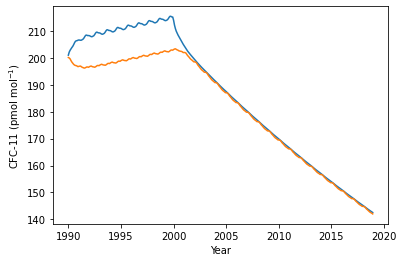

In [6]:
plt.plot(mod.time, mod.mf[:, 0])
plt.plot(mod.time, mod.mf[:, 3])
plt.ylabel("%s (pmol mol$^{-1}$)" % mod.species)
plt.xlabel("Year")
plt.show()

We can also view other outputs such as the burden and loss. Losses are contained in a dictionary, with keys:
- ```OH``` (tropospheric OH losses)
- ```Cl``` (losses via tropospheric chlorine)
- ```other``` (all other first order losses)

For CFC-11, the losses are primarily in the stratosphere, so are contained in ```other```:

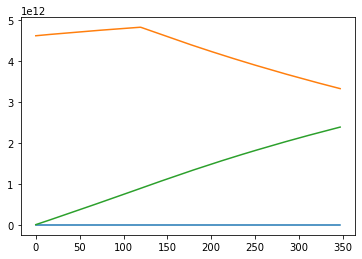

In [7]:
plt.plot(mod.emissions.sum(axis = 1).cumsum())
plt.plot(mod.burden.sum(axis = 1))
plt.plot(mod.losses["other"].sum(axis = 1).cumsum())

Another useful output is the lifetime. This is broken down in a variety of ways. Here we'll plot the global lifetime:

Text(0, 0.5, 'Global mean lifetime (years)')

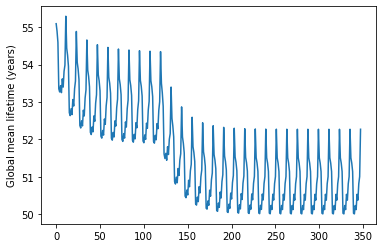

In [8]:
plt.plot(mod.lifetimes["global_total"])
plt.ylabel("Global mean lifetime (years)")